Generally the first cell is to import the libraries that will be used. 

In [26]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

Now I'm going to import the dataset I'm interested in analyzing.

In [12]:
acc_df = dmba.load_data('AccidentsFull.csv')
acc_df.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [5]:
acc_df.shape

(42183, 24)

In [13]:
acc_df.columns

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'],
      dtype='object')

In [15]:
acc_df = acc_df.rename(columns={'MANCOL_I_R': 'Collision','NO_INJ_I':'InjuryNum', 'FATALITIES':'Fatal'})
acc_df.columns

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'Collision', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'InjuryNum',
       'PRPTYDMG_CRASH', 'Fatal', 'MAX_SEV_IR'],
      dtype='object')

In [18]:
acc_df2 = acc_df[['Collision','InjuryNum','Fatal']]

In [19]:
acc_df2

,Collision,InjuryNum,Fatal
0,0,1,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0
...,...,...,...
42178,0,0,0
42179,0,1,0
42180,0,0,0
42181,0,0,0


In [20]:
acc_df2.describe()

,Collision,InjuryNum,Fatal
count,42183.000000,42183.000000,42183.000000
mean,1.337079,0.778702,0.011047
std,0.929756,1.035169,0.104524
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000
max,2.000000,31.000000,1.000000


In [22]:
acc_df2.loc[acc_df2['Collision'] == 2, 'InjuryNum'].sum()

22750

In [23]:
acc_df2.loc[acc_df2['Collision'] == 1, 'InjuryNum'].sum()

1282

In [24]:
acc_df2.loc[acc_df2['Collision'] == 0, 'InjuryNum'].sum()

8816

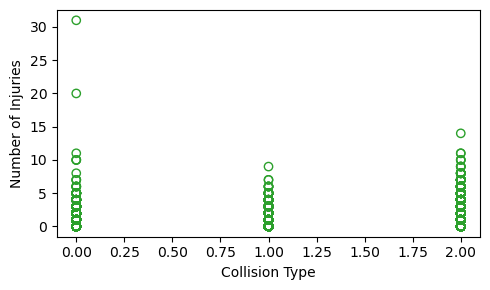

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(acc_df2.Collision, acc_df2.InjuryNum, color='C2', facecolor='none')
plt.xlabel('Collision Type')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()

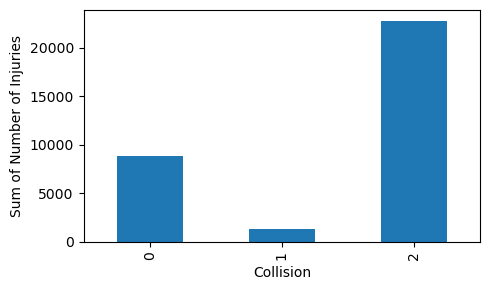

In [38]:
ax = acc_df2.groupby('Collision').sum().InjuryNum.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Injuries')

plt.tight_layout()
plt.show()

In [39]:
print("Check for Missing Values")
missingValues = acc_df2.isnull().sum().sort_values(ascending=False)
missingValues

Check for Missing Values


Collision    0
InjuryNum    0
Fatal        0
dtype: int64